In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:

# Load the dataset
data = pd.read_csv('IRIS.csv')
data.tail()

,sepal_length,sepal_width,petal_length,petal_width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [ ]:
# Check for missing values
missing_data = data.isnull().sum()
print(missing_data)

# Drop non-numeric columns
numerical_data = data.select_dtypes(include=[np.number])

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64


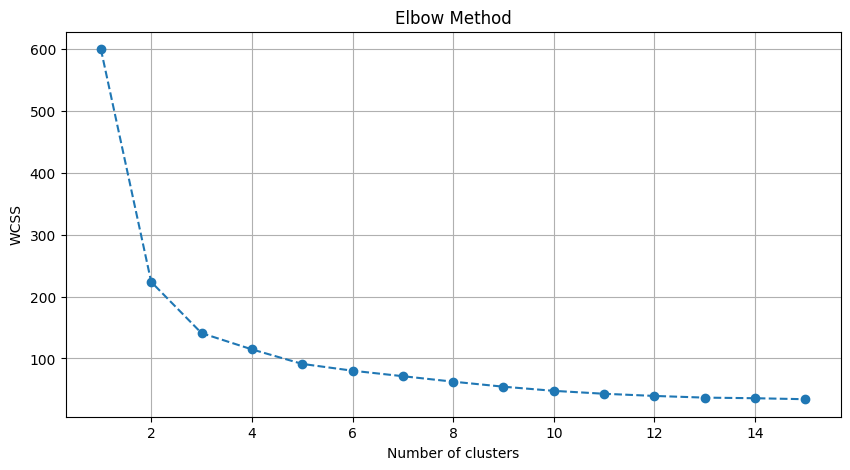

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

# Let's check for up to 15 clusters to get a clearer view of where the elbow might be
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 16), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

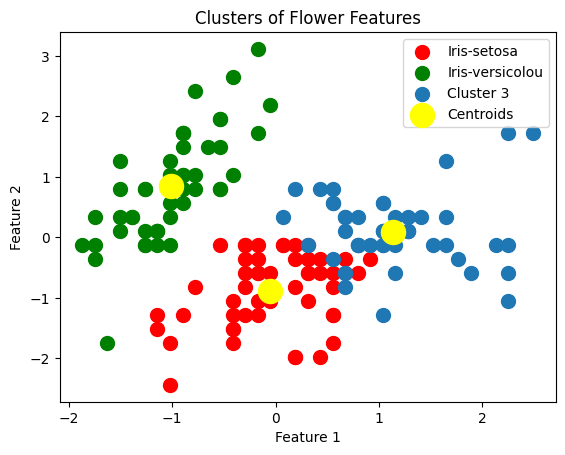

In [ ]:
# Assuming optimal_clusters is the number of clusters you've determined from the elbow method
optimal_clusters = 3  # Replace with the number you deduced

# Initializing and fitting the KMeans model
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clustered_data = kmeans.fit_predict(scaled_data)

# Adding the cluster labels to the original dataset
data['Cluster'] = clustered_data

# Visualizing the clusters
plt.scatter(scaled_data[clustered_data == 0, 0], scaled_data[clustered_data == 0, 1], s=100, c='red', label='Iris-setosa')
plt.scatter(scaled_data[clustered_data == 1, 0], scaled_data[clustered_data == 1, 1], s=100, c='green', label='Iris-versicolou')
if optimal_clusters > 2:
    for i in range(2, optimal_clusters):
        plt.scatter(scaled_data[clustered_data == i, 0], scaled_data[clustered_data == i, 1], s=100, label=f'Cluster {i + 1}')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Flower Features')
plt.xlabel('Feature 1')  # Replace with the actual feature name
plt.ylabel('Feature 2')  # Replace with the actual feature name
plt.legend()
plt.show()


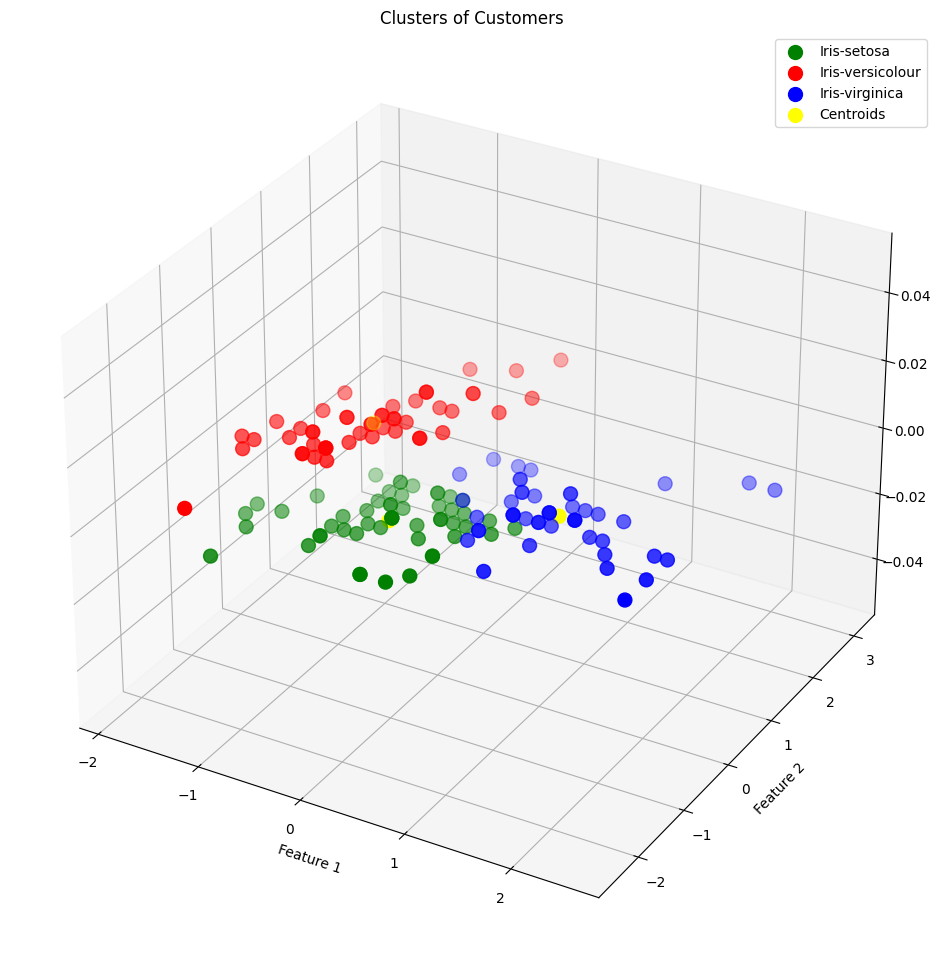

In [ ]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(scaled_data[clustered_data == 0, 0], scaled_data[clustered_data == 0, 1], s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(scaled_data[clustered_data == 1, 0], scaled_data[clustered_data == 1, 1], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(scaled_data[clustered_data == 2, 0], scaled_data[clustered_data == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Flower Features')
plt.xlabel('Feature 1')  # Replace with the actual feature name
plt.ylabel('Feature 2')  # Replace with the actual feature name
plt.legend()
plt.show()